To sum up:
Suppose that we are in the situation where we have 3 qubits and we know that the solution to our problem is a computational basis state, i.e. an element of the set
 $$\Beta = {\Ket{000},\Ket{001}, \Ket{010}, ... , \Ket{111}}$$
We don’t know exactly what the basis state is, so we would like to generate an ansatz expressive enough so that:
$$U(\overrightarrow{\theta_0})\Ket{000} = \Ket{000}$$
$$U(\overrightarrow{\theta_1})\Ket{000} = \Ket{001}$$
$$U(\overrightarrow{\theta_2})\Ket{000} = \Ket{010}$$
.
.
.
$$U(\overrightarrow{\theta_7})\Ket{000} = \Ket{111}$$
for certain values of $\overrightarrow{\theta_i}$. An example of ansatz that accomplishes this would be the following circuit:
![circuit](./images/The%20Super%20Parameter_1.png)
You are asked to build an ansatz that, with only **one parameter**, is able to generate all the basis states.

In [17]:
from IPython.core.display_functions import display
import json
import pennylane as qml
import pennylane.numpy as np
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import QFT

We want to visualize basis state using Qiskit Statevector. And visualize using of QFT on the exact state. Comparison of basis state and state after QFT.

<IPython.core.display.Latex object>

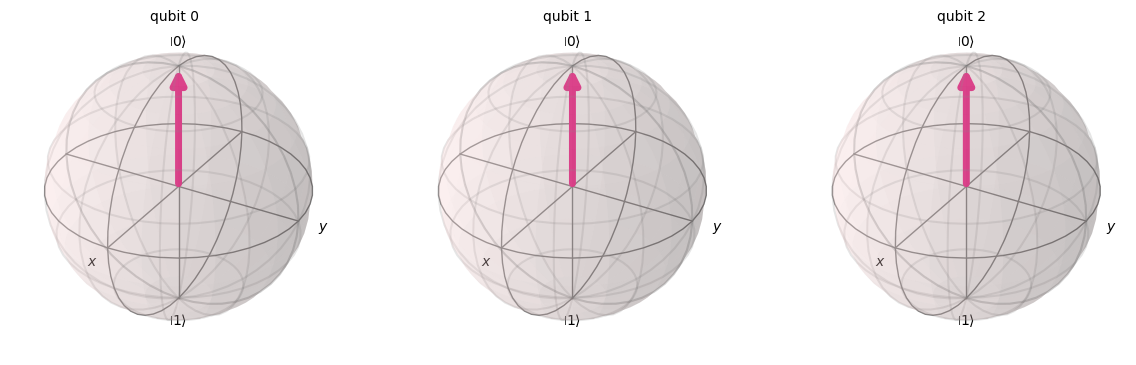

<IPython.core.display.Latex object>

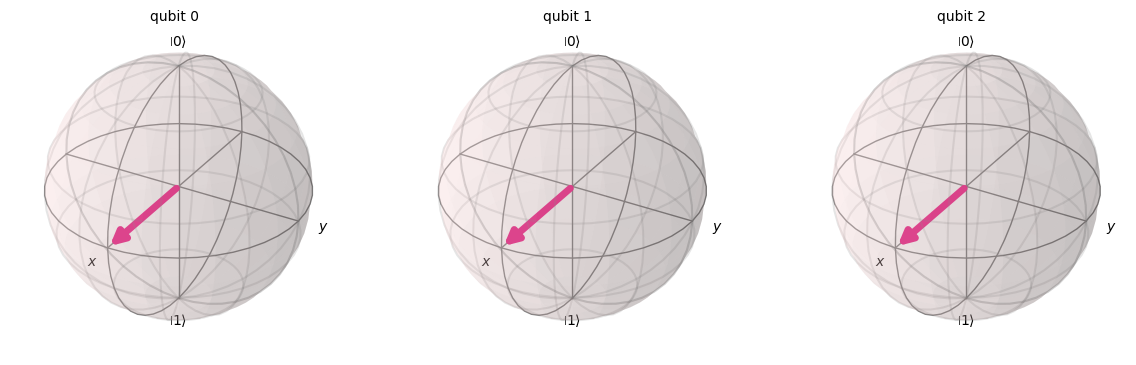

In [20]:
state = 0
V = Statevector.from_int(state,2**3)
display(V.draw(output='latex'))
display(V.draw('bloch'))

# State after using QFT
V_qft = V.evolve(QFT(3))
display(V_qft.draw(output='latex'))
display(V_qft.draw('bloch'))

Next state:state = 0

<IPython.core.display.Latex object>

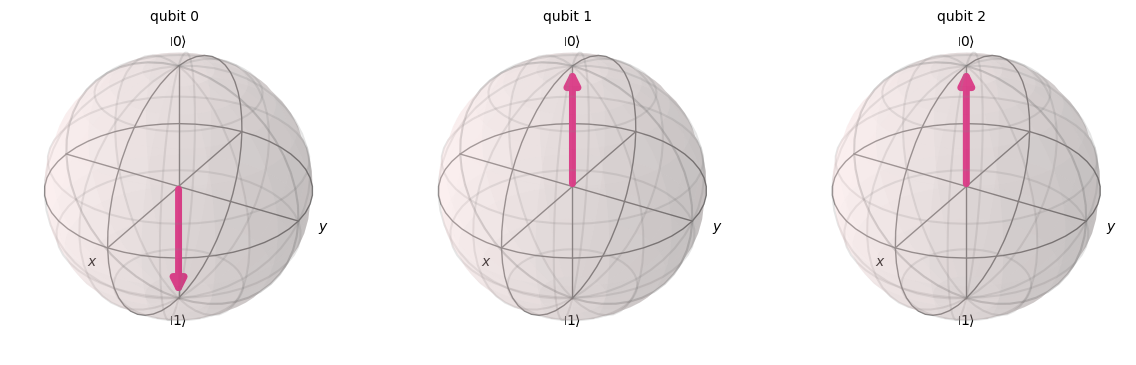

<IPython.core.display.Latex object>

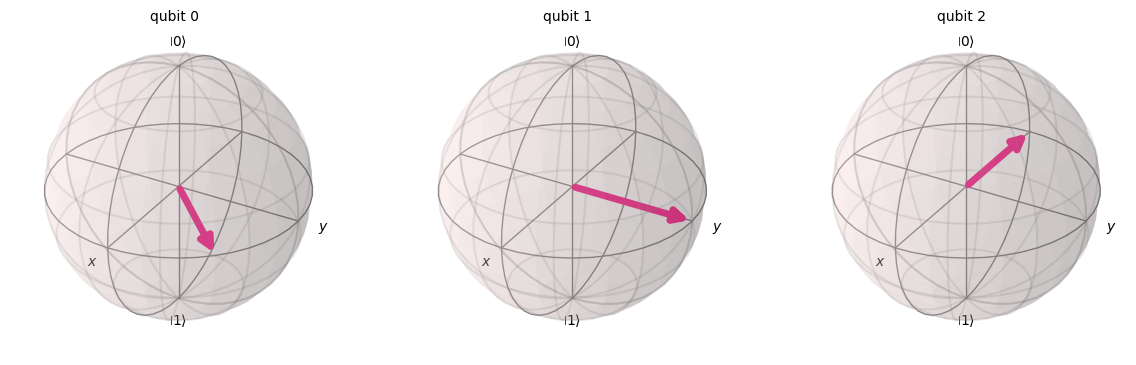

In [22]:
V = Statevector.from_int(state,2**3)
display(V.draw(output='latex'))
display(V.draw('bloch'))

# State after using QFT
V_qft = V.evolve(QFT(3))
display(V_qft.draw(output='latex'))
display(V_qft.draw('bloch'))

Qft -> rotate specific qubit by pi/4,pi/2,pi

In [37]:
dev = qml.device("default.qubit", wires = 3)

@qml.qnode(dev)
def model(alpha):

    qml.QFT(wires=range(3)) #qml.broadcast(qml.Hadamard,wires = range(3),pattern="single")
    qml.RZ(4*alpha, wires = 0)
    qml.RZ(2*alpha, wires = 1)
    qml.RZ(alpha, wires = 2)

    qml.adjoint(qml.QFT)(wires = range(3))

    return qml.state()

## The Super Parameter

**Backstory**

At Trine's Designs, the coffee machine is a programmable quantum device. It has three dials that tell the machine the type of drink it will prepare. However, two of the dials are broken. Trine, the CEO, is in despair: "Coffee is essential for employees to function optimally." So, as a provisional solution while they contact the manufacturer, Trine calls Zenda and Reece to quickly reprogram the device so that it works with only one dial.

**Expressivity in Quantum Machine Learning**

Within QML it is common to find the term expressivity, which refers to the size of all possible models that we can generate by varying our parameters. One way to increase the expressivity of our model family is usually by adding more parameters. However, this is not always a good thing, since increasing the number of parameters, and therefore the number of possible models, means that we have to perform our training on a very large set, making it more difficult to find the model that best suits our needs. Therefore, the real challenge of a good QML researcher is to find the smallest possible family of models that still contains the optimal solution. There is much more to the notion of expressivity, but in this challenge we are going to push the concept to its limits.

Suppose that we are in the situation where we have 3 qubits and we know that the solution to our problem is a computational basis state, i.e. an element of the set
$$\Beta = {\Ket{000},\Ket{001}, \Ket{010}, ... , \Ket{111}}$$
We don't know exactly what the basis state is, so we would like to generate an ansatz expressive enough so that:
$$U(\overrightarrow{\theta_0})\Ket{000} = \Ket{000}$$
$$U(\overrightarrow{\theta_1})\Ket{000} = \Ket{001}$$
$$U(\overrightarrow{\theta_2})\Ket{000} = \Ket{010}$$
.
.
.
$$U(\overrightarrow{\theta_7})\Ket{000} = \Ket{111}$$
for certain values of $\overrightarrow{\theta_i}$. An example of ansatz that accomplishes this would be the following circuit:
![circuit](./images/The%20Super%20Parameter_1.png)
This is the fundamental concept in [Basis embedding](https://pennylane.ai/blog/2022/08/how-to-embed-data-into-a-quantum-state/), where you can see that by taking $\alpha$, $\beta$ and $\gamma$ properly, we can generate any basis state. However, this challenge is not going to be this easy. You are asked to build an ansatz that, with only one parameter, is able to generate all the basis states. To judge your solution, we will ask you to provide us with a list of the 8 values of the parameter that generate each of them. Good luck!

**Challenge code**
You must complete the qnode model that will be in charge of obtaining different outputs. This model depends on a single parameter and you must ensure that it generates all the basis states. You must also define the function generate_coefficients, which will return a list with the 8 values of the parameter to generate these basis states.

**Output**

To judge this challenge, the generate_coefficients function will be called first. With the output of this function (the eight coefficients), we will call the model to ensure that the generated states are the desired ones. In addition, we will check that:

* The model is continuous (small modifications of the parameter imply small modifications of the generated state). By putting the parameter inside rotation gates you will have no problems with this.

* The generated coefficients are in the interval [0,10]. Solutions that do not fit this interval will be considered incorrect.

In this challenge, we will not work with public and private tests. We will simply check that all of the above is fulfilled. Good luck!

In [7]:
def generate_coefficients():
    coeffs = [2*np.pi/8 *i for i in range(8)]
    return coeffs

In [16]:
import json
import pennylane as qml
import pennylane.numpy as np

dev = qml.device("default.qubit", wires=3)


@qml.qnode(dev)
def model(alpha):
    """In this qnode you will define your model in such a way that there is a single
    parameter alpha which returns each of the basic states.

    Args:
        alpha (float): The only parameter of the model.

    Returns:
        (numpy.tensor): The probability vector of the resulting quantum state.
    """
    qml.QFT(wires=range(3))
    qml.RZ(4*alpha, wires = 0)
    qml.RZ(2*alpha, wires = 1)
    qml.RZ(alpha, wires = 2)

    qml.adjoint(qml.QFT)(wires = range(3))

    return qml.probs(wires=range(3))

def generate_coefficients():
    """This function must return a list of 8 different values of the parameter that
    generate the states 000, 001, 010, ..., 111, respectively, with your ansatz.

    Returns:
        (list(int)): A list of eight real numbers.
    """
    coeffs = [k * np.pi/4 for k in range(8)] # 2* pi / 8
    return coeffs


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    return None

def check(solution_output, expected_output: str) -> None:
    coefs = generate_coefficients()
    output = np.array([model(c) for c in coefs])
    epsilon = 0.001

    for i in range(len(coefs)):
        assert np.isclose(output[i][i], 1)

    def is_continuous(function, point):
        limit = calculate_limit(function, point)

        if limit is not None and sum(abs(limit - function(point))) < epsilon:
            return True
        else:
            return False

    def is_continuous_in_interval(function, interval):
        for point in interval:
            if not is_continuous(function, point):
                return False
        return True

    def calculate_limit(function, point):
        x_values = [point - epsilon, point, point + epsilon]
        y_values = [function(x) for x in x_values]
        average = sum(y_values) / len(y_values)

        return average

    assert is_continuous_in_interval(model, np.arange(0,10,0.001))

    for coef in coefs:
        assert coef >= 0 and coef <= 10


test_cases = [['No input', 'No output']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input 'No input'...
Correct!
